https://colab.research.google.com/drive/1a8R54TUFHgrwBASTWk-aYf9lXmagCH1H

Load modules and dataset



In [ ]:
from IPython import display
import math
from pprint import pprint #pretty print json & list
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns #add stype to matplolib graphs 
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/bbc_test_novideos_v2.csv',encoding = 'latin1')

In [ ]:
df.head

<bound method NDFrame.head of                                                  link  ...                                               text
0          https://www.bbc.co.uk/news/health-47749964  ...  Psychiatrists are being urged to ask children ...
1              https://www.bbc.co.uk/news/uk-47751285  ...  The number of adults seeking help to cope with...
2          https://www.bbc.co.uk/news/health-47735103  ...  The current system of checking newborns for hi...
3          https://www.bbc.co.uk/news/health-47735108  ...  Calorie-filled Easter eggs are being sold in s...
4          https://www.bbc.co.uk/news/health-47749025  ...  "She is so desperate to end it all, she curren...
..                                                ...  ...                                                ...
95         https://www.bbc.co.uk/news/health-48256759  ...  Glucosamine supplements, better known as a rem...
96  https://www.bbc.co.uk/news/world-us-canada-482...  ...  Alabama has become the latest 

In [ ]:
print(df. columns)

Index(['link', 'Sentiment ', 'text'], dtype='object')


In [ ]:
text = list(df.loc[:, "text"].values)

In [ ]:
[t.strip() for t in text]

['Psychiatrists are being urged to ask children with mental health issues how long they spend online and what they use social media for.\nQuestions about technology should be a routine part of assessments, the Royal College of Psychiatrists says. \nIt is concerned about how time spent online impacts on mood, sleep, diet and behaviour.\nThe government is expected to announce plans to regulate social media companies soon.\nThe College\'s advice comes as evidence grows of a possible link between harmful content or time spent online, and poor mental health.\nIt is planning to publish a report later this year about its stance on technology use and children\'s mental health, which will include recommendations for parents, children and doctors.\nWhen assessing children, psychiatrists are being advised to think about:\nThe Royal College of Psychiatrists recommends that children stop using technology at least an hour before going to bed, and avoid using technology at mealtimes.\nThis is a view 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

new_words = {
    'to attack':-0.5,
    'backwards':-0.5,
    'alert':0.5,
    'anxiety disorder':-0.4,
    'baal':-0.4,
    'sucks':-0.4,
    'shortness of breath':-0.5,
    'side effect':-0.4,
    'bladder infection':-0.5,
    'bleed':-0.5,
    'blood loss':-0.5,
    'stomachache':-0.5,
    'decisive':0.4,
    'intenstinal complaints':-0.4,
    'depression':-0.5,
    'diarrhea':-0.5,
    'breakthrough':0.5,
    'down':-0.4,
    'giddy':-0.4,
    'dream':0.4,
    'dizziness':-0.5,
    'appetite':0.4,
    'misery':-0.5,
    'energy':0.5,
    'worse':-0.4,
    'to enjoy':0.5,
    'swollen':-0.5,
    'hair loss':-0.6,
    'heart attack':-0.5,
    'heart problems':-0.4,
    'palpitations':-0.4,
    'unfortunate':-0.5,
    'help out':0.5,
    'cough':-0.4,
    'headache':-0.5,
    'hayfever':-0.5,
    'skin rash':-0.4,
    'delicious':0.5,
    'incontinence':-0.4,
    'itching':-0.5,
    'sore throat':-0.5,
    'complaint':-0.4,
    'complaints':-0.4,
    'popping':-0.4,
    'banging':-0.5,
    'fever':-0.4,
    'short of breath':-0.4,
    'cramp':-0.4,
    'stomach upset':-0.4,
    'stomach cramps':-0.4,
    'migraine':-0.4,
    'nausea':-0.6,
    'fatigue':-0.5,
    'nightmare':-0.5,
    'constipation':-0.5,
    'unrest':-0.4,
    'ignite':-0.4,
    'inflammation':-0.4,
    'tinnitus':-0.5,
    'rush':-0.5,
    'excited':0.4,
    'stuffed':-0.5,
    'hot flash':-0.4,
    'throw up':-0.6,
    'panic attack':-0.4,
    'pain':-0.4,
    'positive':0.4,
    'fun':0.4,
    'problem':-0.4,
    'reaction':-0.4,
    'rheumatism':-0.5,
    'chills':-0.5,
    'mess':-0.5,
    'crap':-0.5,
    'peace':0.5,
    'calmer':0.5,
    'groom':-0.5,
    'muscle strain':-0.5,
    'more stable':0.5,
    'stab':-0.4,
    'mood swings':-0.5,
    'disorder':-0.5,
    'good luck':0.6,
    'drowsiness':-0.3,
    'satisfaction':0.5,
    'tingling':-0.4,
    'topper':0.6,
    'junk':-0.6,
    'equipped':0.5,
    'improved':-0.5,
    'improvement':0.6,
    'sad':-0.5,
    'common cold':-0.3,
    'lighting':0.5,
    'fatigue':-0.4,
    'trust':0.4,
    'dirty':-0.3,
    'progress':0.3,
    'to work':0.5,
    'panacea':0.7,
    'security':0.4,
    'self confidence':0.4
}



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sia = SIA()
sia.lexicon.update(new_words)
results = []
for line in text:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.923,
  'neg': 0.065,
  'neu': 0.893,
  'pos': 0.042,
  'text': 'Psychiatrists are being urged to ask children with mental health issues how long they '
          'spend online and what they use social media for.\n'
          'Questions about technology should be a routine part of assessments, the Royal College '
          'of Psychiatrists says. \n'
          'It is concerned about how time spent online impacts on mood, sleep, diet and '
          'behaviour.\n'
          'The government is expected to announce plans to regulate social media companies soon.\n'
          "The College's advice comes as evidence grows of a possible link between harmful content "
          'or time spent online, and poor mental health.\n'
          'It is planning to publish a report later this year about its stance on technology use '
          "and children's mental health, which will include recommendations for parents, children "
          'and doctors.\n'
          'When assessing chi

In [ ]:
df2 = pd.DataFrame.from_records(results)
df2.head()

,neg,neu,pos,compound,text
0,0.065,0.893,0.042,-0.9230,Psychiatrists are being urged to ask children ...
1,0.104,0.792,0.104,-0.6118,The number of adults seeking help to cope with...
2,0.097,0.885,0.017,-0.9928,The current system of checking newborns for hi...
3,0.058,0.858,0.084,0.9170,Calorie-filled Easter eggs are being sold in s...
4,0.094,0.796,0.109,0.9199,"""She is so desperate to end it all, she curren..."


In [ ]:
df2['label'] = 0
df2.loc[df2['compound'] > 0.2, 'label'] = 1
df2.loc[df2['compound'] < -0.2, 'label'] = -1
df2.head(100)

,neg,neu,pos,compound,text,label
0,0.065,0.893,0.042,-0.9230,Psychiatrists are being urged to ask children ...,-1
1,0.104,0.792,0.104,-0.6118,The number of adults seeking help to cope with...,-1
2,0.097,0.885,0.017,-0.9928,The current system of checking newborns for hi...,-1
3,0.058,0.858,0.084,0.9170,Calorie-filled Easter eggs are being sold in s...,1
4,0.094,0.796,0.109,0.9199,"""She is so desperate to end it all, she curren...",1
...,...,...,...,...,...,...
95,0.119,0.786,0.095,-0.9155,"Glucosamine supplements, better known as a rem...",-1
96,0.088,0.828,0.084,-0.7050,Alabama has become the latest US state to move...,-1
97,0.102,0.815,0.083,-0.9629,David Williams has been bitten by a snake six ...,-1
98,0.113,0.828,0.059,-0.9876,The world's first drugs designed to stop cance...,-1


In [ ]:
df2[df2['label'] == 1].count

<bound method DataFrame.count of       neg    neu  ...                                               text  label
3   0.058  0.858  ...  Calorie-filled Easter eggs are being sold in s...      1
4   0.094  0.796  ...  "She is so desperate to end it all, she curren...      1
8   0.101  0.798  ...  Pregnant women in England will be able to get ...      1
9   0.079  0.830  ...  Controversial vaginal mesh implants can be off...      1
11  0.026  0.878  ...  Do you ever struggle to tell your left from yo...      1
12  0.056  0.846  ...  A speedy 'non-surgical' nose job that takes ju...      1
13  0.028  0.918  ...  People in the UK are more likely to combine dr...      1
15  0.058  0.845  ...  A 61-year-old Nebraskan woman has told of her ...      1
16  0.049  0.846  ...  US President Donald Trump has said he wants to...      1
17  0.039  0.870  ...  A growing number of parents are confused about...      1
22  0.093  0.797  ...  Measles is one of the world's most infectious ...      1
23  0.0

In [ ]:
df2[df2['label'] == -1].count

<bound method DataFrame.count of       neg    neu  ...                                               text  label
0   0.065  0.893  ...  Psychiatrists are being urged to ask children ...     -1
1   0.104  0.792  ...  The number of adults seeking help to cope with...     -1
2   0.097  0.885  ...  The current system of checking newborns for hi...     -1
5   0.060  0.885  ...  A prescription drug linked to 33 deaths in 201...     -1
6   0.059  0.902  ...  The sun is shining on your skin, there's a bre...     -1
7   0.116  0.821  ...  China says it will crack down on all types of ...     -1
10  0.090  0.852  ...  The countdown has begun to the launch of one o...     -1
14  0.080  0.896  ...  A judge in Brazil has ordered identical twin b...     -1
18  0.143  0.774  ...  The food we eat is putting 11 million of us in...     -1
19  0.086  0.837  ...  The routine vaccination of girls with the HPV ...     -1
20  0.084  0.845  ...  Failing to apply moisturiser with sun protecti...     -1
21  0.0

In [ ]:
df2[df2['label'] == 0].count

<bound method DataFrame.count of       neg    neu  ...                                               text  label
59  0.047  0.899  ...  A large-scale pilot of what has been called th...      0

[1 rows x 6 columns]>

In [ ]:
df3 = df2[['text', 'label']]
df3.to_csv('sentiment1.csv', mode='a', encoding='utf-8', index=False)

In [ ]:
print("Positive texts:\n")
pprint(list(df2[df2['label'] == 1].text)[:5], width=200)

print("\nNegative texts:\n")
pprint(list(df2[df2['label'] == -1].text)[:5], width=200)

Positive texts:

['Calorie-filled Easter eggs are being sold in shops far too early and that is tempting parents to buy unhealthy treats for their children, a public health body says.\n'
 'It is not unusual to find Easter eggs on sale in the first week of January - but most people are irritated by the practice, the Royal Society of Public Health said. \n'
 'It wants retailers to crack down on early sales of seasonal products high in fat, salt and sugar.\n'
 'Shirley Cramer, chief executive of the Royal Society for Public Health (RSPH), said: "We recognise that special occasions such as Easter are a time for indulgence and treats.  \n'
 '"However, it is clear that many shops and supermarkets are pushing products way too early.\n'
 '"If supermarkets are serious about tackling the obesity epidemic, we would urge retailers to change their marketing strategies in the interest of the public\'s health."\n'
 'In a survey of 2,000 adults in the UK, two-thirds said holidays and special occasions

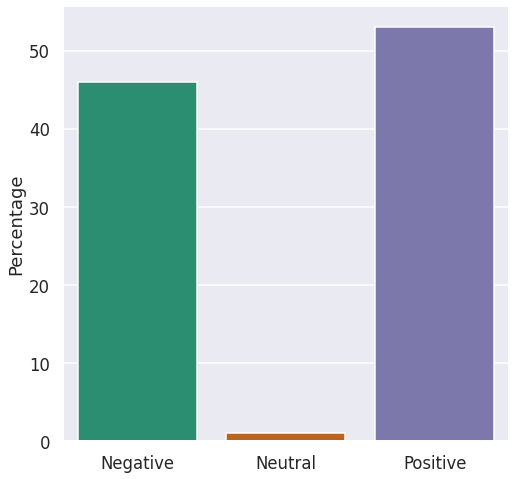

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')
tokenizer = RegexpTokenizer(r'\w+') #remove punctuation 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
def process_text(text):
    tokens = []
    for line in text:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [ ]:
pos_lines = list(df3[df3.label == 1].text)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('said', 242),
 ('people', 179),
 ('says', 157),
 ('one', 114),
 ('would', 105),
 ('could', 105),
 ('health', 88),
 ('like', 85),
 ('year', 77),
 ('also', 73),
 ('children', 72),
 ('uk', 70),
 ('time', 69),
 ('told', 65),
 ('years', 62),
 ('patients', 62),
 ('nhs', 60),
 ('many', 59),
 ('two', 59),
 ('child', 59)]

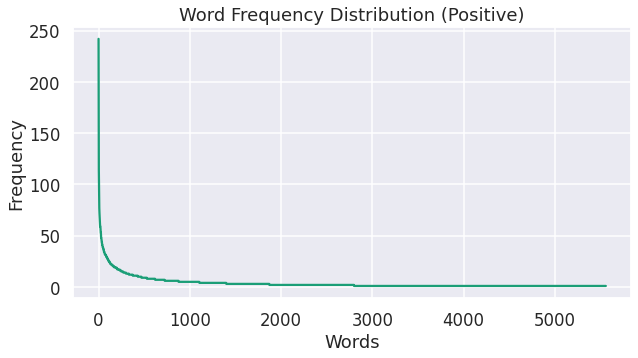

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

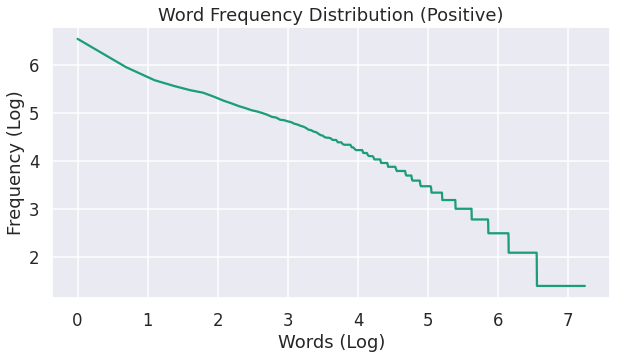

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
pos_word_list = [i[0] for i in pos_freq.most_common(50)]

In [ ]:
pos_word_list[:6]

['said', 'people', 'says', 'one', 'would', 'could']

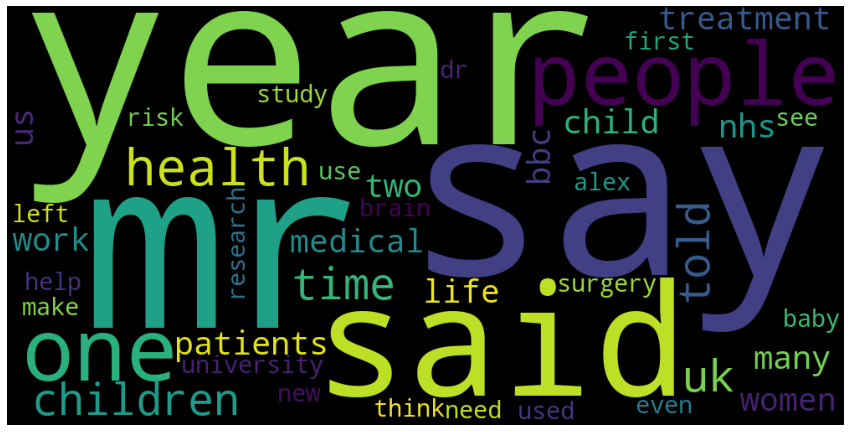

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(pos_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
neg_lines = list(df3[df3.label == -1].text)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('said', 205),
 ('people', 144),
 ('cancer', 115),
 ('one', 98),
 ('says', 96),
 ('health', 91),
 ('would', 88),
 ('brain', 85),
 ('disease', 71),
 ('year', 64),
 ('risk', 60),
 ('women', 60),
 ('could', 59),
 ('study', 59),
 ('children', 58),
 ('new', 58),
 ('us', 55),
 ('dementia', 54),
 ('also', 53),
 ('research', 51)]

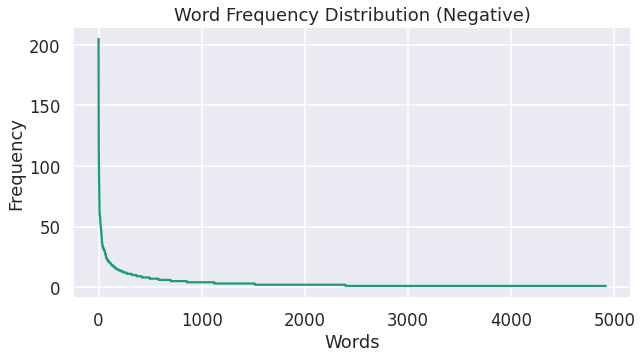

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

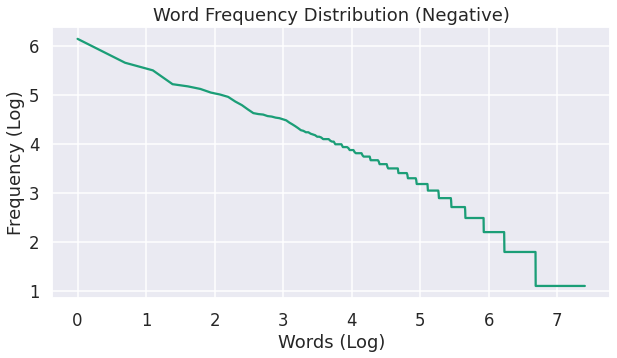

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_word_list = [i[0] for i in neg_freq.most_common(50)]

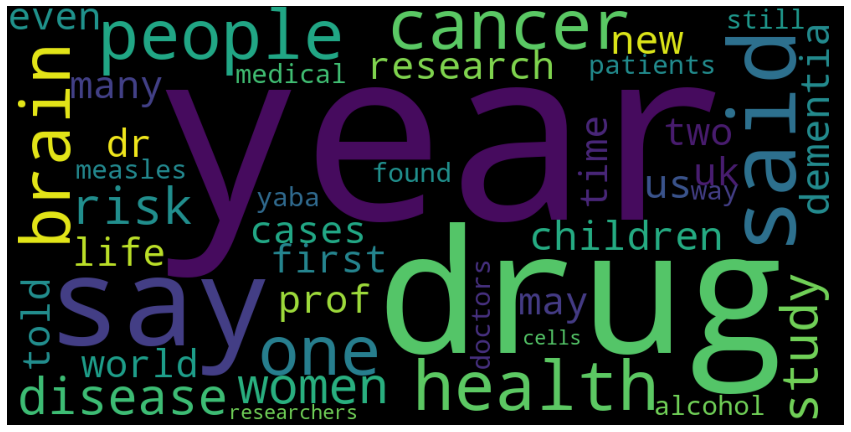

In [ ]:
neg_unique_string=(" ").join(neg_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(neg_unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
sentiment_label =df.iloc[:, 1]
comparison = np.where(sentiment_label == df2['label'], True, False)

In [ ]:
print(comparison)

[ True  True  True False False  True False False  True False  True False
 False False  True  True False False  True False False  True False False
  True False False False  True False False False False False  True False
  True  True False False  True False  True False  True  True  True  True
  True False False False False False  True False False False  True False
 False False False False  True False False  True False False False False
 False  True False  True  True  True False False False  True False  True
  True False False  True False  True False False False  True  True False
 False False False  True]


In [ ]:
np.count_nonzero(comparison)

38